In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
"since all the images are of size 256*256 we will take them as constants even for later use"
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "plantvillage",
    shuffle = True,
    image_size  = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE

)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
"When looking for lenghth we see it will show 68 because total 2152 can be divided into 68 batches sized 32"
len(dataset)

68

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 1 1 0 0 0 0 2 1 2 1 0 0 2 1 0 0 0 0 0 2 0 0 0 0 1 1 0 0 1 1]


In [7]:
"with reference to code baove lets print the arrays for a particular Image"
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())
   

[[[144. 137. 145.]
  [142. 135. 143.]
  [144. 137. 145.]
  ...
  [102.  92. 100.]
  [109.  99. 107.]
  [118. 108. 116.]]

 [[143. 136. 144.]
  [142. 135. 143.]
  [145. 138. 146.]
  ...
  [111. 101. 109.]
  [113. 103. 111.]
  [118. 108. 116.]]

 [[146. 139. 147.]
  [144. 137. 145.]
  [147. 140. 148.]
  ...
  [122. 112. 120.]
  [123. 113. 121.]
  [124. 114. 122.]]

 ...

 [[178. 169. 174.]
  [174. 165. 170.]
  [172. 163. 168.]
  ...
  [151. 140. 144.]
  [148. 137. 141.]
  [144. 133. 137.]]

 [[179. 170. 175.]
  [175. 166. 171.]
  [173. 164. 169.]
  ...
  [146. 135. 139.]
  [149. 138. 142.]
  [150. 139. 143.]]

 [[176. 167. 172.]
  [173. 164. 169.]
  [172. 163. 168.]
  ...
  [134. 123. 127.]
  [142. 131. 135.]
  [147. 136. 140.]]]


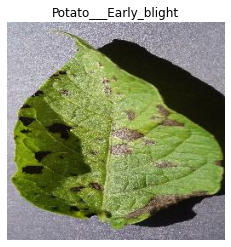

In [8]:
"some vsiualization of images"
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8")) ##as type uint8 will make the no integers
    plt.title(class_names[label_batch[0]]) #here level batch will be class index
    plt.axis("off") #dont want to se axis labels

In [9]:
train_size = 0.8
len(dataset)*train_size



54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)

54

In [11]:
"we will have remainig 20 percent as test dataset which is actually a mix of 10%validation set & testset "
test_ds = dataset.skip(54) #it will skip the first 54 batches and take rest in it
len(test_ds)

14

In [12]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_tf(ds,train_split = 0.8,val_split = 0.1,test_split = 0.1,shuffle = True,shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)
    
    train_size = int(train_split*ds_size)
    
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    
    test_ds = ds.skip(train_size).skip(val_size)
    
    
    
    return train_ds,val_ds,test_ds

In [16]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
"The codes below will use cache to store loaded things in memory and prefetch to use cpu& gpu together to make it woek fats"
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [20]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255) 
])

In [21]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2) 
])

In [22]:
"Chalo Model Banate hai"
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3 

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes,activation = 'softmax')
    
])

model.build(input_shape = input_shape)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 32)         

In [24]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
    

)

In [25]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
    
)

Epoch 1/50
54/54 [==============================] - 86s 1s/step - loss: 0.9323 - accuracy: 0.5191 - val_loss: 0.8983 - val_accuracy: 0.4531
Epoch 2/50
54/54 [==============================] - 69s 1s/step - loss: 0.8162 - accuracy: 0.6227 - val_loss: 0.6387 - val_accuracy: 0.7604
Epoch 3/50
54/54 [==============================] - 66s 1s/step - loss: 0.5410 - accuracy: 0.7870 - val_loss: 0.4361 - val_accuracy: 0.7865
Epoch 4/50
54/54 [==============================] - 68s 1s/step - loss: 0.3940 - accuracy: 0.8345 - val_loss: 0.5687 - val_accuracy: 0.7656
Epoch 5/50
54/54 [==============================] - 68s 1s/step - loss: 0.3237 - accuracy: 0.8617 - val_loss: 0.3773 - val_accuracy: 0.8490
Epoch 6/50
54/54 [==============================] - 66s 1s/step - loss: 0.2914 - accuracy: 0.8785 - val_loss: 0.3071 - val_accuracy: 0.8906
Epoch 7/50
54/54 [==============================] - 65s 1s/step - loss: 0.1886 - accuracy: 0.9253 - val_loss: 0.1877 - val_accuracy: 0.9271
Epoch 8/50
54/54 [==

In [26]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 10s 229ms/step - loss: 0.0239 - accuracy: 0.9922


In [27]:
scores

[0.023893466219305992, 0.9921875]

In [28]:
history

In [29]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
history.history['accuracy']

[0.5190972089767456,
 0.6226851940155029,
 0.7870370149612427,
 0.8344907164573669,
 0.8616898059844971,
 0.8784722089767456,
 0.9253472089767456,
 0.9230324029922485,
 0.9421296119689941,
 0.921875,
 0.9479166865348816,
 0.9496527910232544,
 0.9618055820465088,
 0.9554398059844971,
 0.9699074029922485,
 0.9670138955116272,
 0.9762731194496155,
 0.9554398059844971,
 0.9722222089767456,
 0.9670138955116272,
 0.9467592835426331,
 0.9612268805503845,
 0.9751157164573669,
 0.9762731194496155,
 0.9635416865348816,
 0.9658564925193787,
 0.9826388955116272,
 0.9837962985038757,
 0.9756944179534912,
 0.9832175970077515,
 0.9756944179534912,
 0.9780092835426331,
 0.9861111044883728,
 0.9837962985038757,
 0.9710648059844971,
 0.9670138955116272,
 0.9924768805503845,
 0.9861111044883728,
 0.984375,
 0.984375,
 0.9774305820465088,
 0.9890046119689941,
 0.9866898059844971,
 0.9895833134651184,
 0.9878472089767456,
 0.9872685074806213,
 0.9699074029922485,
 0.9762731194496155,
 0.9872685074806213,
 

In [32]:
"Just for the purpose of plotting"
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [33]:
"Now its time to test"
for images_batch, labels_batch in test_ds.take(1):
    print(images_batch[0].numpy())

[[[124. 116. 131.]
  [127. 119. 134.]
  [123. 115. 130.]
  ...
  [135. 124. 138.]
  [134. 123. 137.]
  [133. 122. 136.]]

 [[119. 111. 126.]
  [126. 118. 133.]
  [129. 121. 136.]
  ...
  [135. 124. 138.]
  [134. 123. 137.]
  [132. 121. 135.]]

 [[114. 106. 121.]
  [119. 111. 126.]
  [122. 114. 129.]
  ...
  [135. 124. 138.]
  [133. 122. 136.]
  [132. 121. 135.]]

 ...

 [[129. 121. 134.]
  [121. 113. 126.]
  [127. 119. 132.]
  ...
  [141. 133. 144.]
  [142. 134. 145.]
  [142. 134. 145.]]

 [[132. 124. 137.]
  [124. 116. 129.]
  [128. 120. 133.]
  ...
  [139. 131. 142.]
  [139. 131. 142.]
  [139. 131. 142.]]

 [[138. 130. 143.]
  [131. 123. 136.]
  [138. 130. 143.]
  ...
  [144. 136. 147.]
  [143. 135. 146.]
  [143. 135. 146.]]]


first image to predict
actual label : Potato___Early_blight
predicted is : Potato___Late_blight


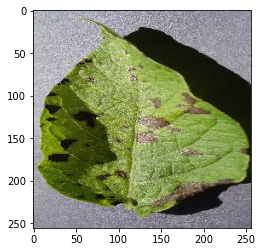

In [34]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print('first image to predict')
    plt.imshow(first_image)
    print("actual label :",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted is :",class_names[np.argmax(batch_prediction[0])])

In [38]:
#we have changed the model to the h5 format
model_version = 1
model.save(f"../models/model.h5")

In [39]:
model.save('../models/model2.h5')